# Predecir las enfermedades cardiacas usando machine learning

Este notebook introduce conceptos fundamentales de machine learning y ciencia de datos mediante el problema de **clasificación** de enfermedad cardiaca.

Dado un conjunto de características de salud de una persona, construiremos un modelo para predecir si presenta o no enfermedad cardiaca.

El objetivo es mostrar un ejemplo de extremo a extremo de cómo podría verse un **proof of concept** en ciencia de datos y machine learning.

## ¿Qué es la clasificación?

La clasificación consiste en decidir si una muestra pertenece a una clase u otra (**clasificación binaria**).

Si existen múltiples opciones de clase, hablamos de **clasificación multiclase**.

## Qué obtendremos

Comenzaremos con el dataset de enfermedad cardiaca usado en módulos anteriores y abordaremos el problema siguiendo el marco de modelado en machine learning.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/ml101-6-step-ml-framework-tools.png?raw=true" width=500/> |
|:--:|
| Marco de Modelado de Machine Learning en 6 Pasos |

Más específicamente, revisaremos los siguientes temas:

| Paso | Contenido |
|:-----|:----------|
| **Análisis exploratorio de datos (EDA)** | Examinar el dataset para comprenderlo mejor. |
| **Entrenamiento de modelos** | Crear uno o varios modelos que aprendan a predecir una variable objetivo. |
| **Evaluación de modelos** | Evaluar las predicciones mediante métricas específicas del problema. |
| **Comparación de modelos** | Comparar distintos modelos para encontrar el mejor. |
| **Ajuste de hiperparámetros** | Mejorar un modelo ajustando sus hiperparámetros. |
| **Importancia de características** | Identificar qué variables aportan más a la predicción. |
| **Validación cruzada** | Verificar si un buen modelo también funciona con datos no vistos. |
| **Reporte de resultados** | Preparar cómo presentar los hallazgos. |

Para desarrollar estos puntos utilizaremos pandas, Matplotlib y NumPy para análisis de datos, y Scikit-Learn para las tareas de machine learning.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> |
|:--:|
| Herramientas utilizadas en cada paso del proceso de modelado. |

Al finalizar, dispondremos de varios modelos capaces de predecir con buena precisión si una persona tiene enfermedad cardiaca basándose en diferentes parámetros.

También podrás identificar cuáles de esos parámetros aportan más al diagnóstico; por ejemplo, el sexo podría ser más relevante que la edad.

## 1. Recorriendo el marco de Machine Learning en 6 pasos

### 1.1 Definición del problema

En este caso, el problema a abordar es una **clasificación binaria** (cada muestra solo puede pertenecer a una de dos clases).

Usaremos diversas **características** (información clínica o de salud) de una persona para predecir si presenta enfermedad cardiaca o no.

En una frase:

*Dado un conjunto de parámetros clínicos de un paciente, ¿podemos predecir si tiene enfermedad cardiaca?*

### 1.2 ¿Qué datos estamos utilizando?

Aquí corresponde revisar en detalle los datos sobre los que se basa la definición del problema.

Esto puede incluir obtener el dataset (si no existe previamente), definir parámetros, consultar a expertos y entender qué valores esperar.

Los datos originales provienen de la [base de datos de Cleveland](https://archive.ics.uci.edu/dataset/45/heart+disease) del UCI Machine Learning Repository.

Sin embargo, utilizaremos una versión ya formateada disponible en [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

La base original contiene 76 atributos, pero aquí solo usaremos 14. Los **atributos** (o **features**) son las variables que utilizaremos para predecir nuestra **variable objetivo**.

Los atributos o features también se conocen como **variables independientes**, mientras que la variable objetivo se denomina **variable dependiente**.

> **Nota:** Las variables independientes se usan para predecir la(s) variable(s) dependiente(s).

En nuestro caso, las variables independientes son los distintos parámetros médicos del paciente y la variable dependiente es si presenta o no enfermedad cardiaca.

### 1.3 ¿Cómo evaluaremos nuestro modelo?

Una métrica de evaluación suele definirse al inicio de un proyecto.

Sin embargo, como el machine learning es altamente experimental, esta métrica puede ajustarse con el tiempo.

Para comenzar, podrías plantear algo como:

*Si durante el proof of concept logramos un 95% de precisión al predecir si un paciente tiene enfermedad cardiaca, continuaremos con el proyecto.*

Esto es útil porque establece un objetivo inicial hacia el cual puede trabajar el científico de datos o ingeniero de machine learning.


### 1.4 ¿Qué características del dataset serán importantes para nosotros?

Las *features* son las distintas partes o características de los datos.

En este paso conviene explorar qué representa cada variable y generar una referencia que puedas consultar más adelante.

Una de las formas más comunes de hacerlo es crear un **diccionario de datos**.

#### Diccionario de Datos del Dataset de Enfermedad Cardiaca

Un diccionario de datos describe las variables con las que estás trabajando.

No todos los datasets incluyen uno, por lo que es posible que debas investigarlo o consultar a un **experto en la materia** (alguien que conozca el dominio).

A continuación se muestran las *features* que utilizaremos para predecir nuestra variable objetivo (presencia o ausencia de enfermedad cardiaca).

| Feature  | Descripción | Ejemplos |
|:---------|:------------|:---------|
| **age** | Edad en años | 29, 45, 60 |
| **sex** | 1 = hombre; 0 = mujer | 0, 1 |
| **cp**  | Tipo de dolor torácico | 0: Angina típica, 1: Angina atípica, 2: Dolor no anginoso, 3: Asintomático |
| **trestbps** | Presión arterial en reposo (mm Hg al ingreso) | 120, 140, 150 |
| **chol** | Colesterol sérico en mg/dl | 180, 220, 250 |
| **fbs** | Glucosa en ayunas > 120 mg/dl (1 = sí; 0 = no) | 0, 1 |
| **restecg** | Resultados del electrocardiograma en reposo | 0: Normal, 1: Anomalía ST-T, 2: Hipertrofia ventricular izquierda |
| **thalach** | Frecuencia cardíaca máxima alcanzada | 160, 180, 190 |
| **exang** | Angina inducida por ejercicio (1 = sí; 0 = no) | 0, 1 |
| **oldpeak** | Depresión del ST inducida por ejercicio respecto al reposo | 0.5, 1.0, 2.0 |
| **slope** | Pendiente del segmento ST en el pico del ejercicio | 0: Ascendente, 1: Plana, 2: Descendente |
| **ca** | Número de vasos principales (0–3) coloreados por fluoroscopia | 0, 1, 2, 3 |
| **thal** | Resultado del test con talio | 1: Normal, 3: Normal, 6: Defecto fijo, 7: Defecto reversible |
| **target** | Presencia de enfermedad (1 = sí; 0 = no) | 0, 1 |

> **Nota:** El dataset no contiene información personal identificable (PII).

Es recomendable guardar este diccionario en una variable de Python o en un archivo externo para consultarlo más adelante sin volver a esta sección.


## 2. Preparando las herramientas

Al inicio de cualquier proyecto es común ver todas las librerías necesarias importadas en un solo bloque (como se muestra en la celda de código siguiente).

Sin embargo, en la práctica, cuando comienzas un proyecto nuevo es habitual ir importando librerías a medida que las necesitas (porque al principio no sabes exactamente cuáles requerirás).

Después de trabajar un par de horas en el problema, probablemente quieras ordenar el código.  
En ese momento suele ser útil reunir todas las librerías utilizadas al inicio del notebook.

Las librerías que uses variarán según el proyecto, pero hay algunas que serán útiles en casi cualquier trabajo con datos estructurados:

* [pandas](https://pandas.pydata.org/) para análisis de datos.  
* [NumPy](https://numpy.org/) para operaciones numéricas.  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
* [Matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/) para gráficos y visualización.  
* [Scikit-Learn](https://scikit-learn.org/stable/) para modelado y evaluación en machine learning.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For plots inside the notebook
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [8]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploración de Datos (Exploratory Data Analysis o EDA)

El objetivo aquí es conocer mejor el dataset y convertirte en alguien que domina su contenido.

1. ¿Qué pregunta(s) estás intentando responder?  
2. ¿Qué tipo de datos tenemos y cómo debemos tratarlos según su naturaleza?  
3. ¿Qué falta en el dataset y cómo deberíamos manejar esos valores faltantes?  
4. ¿Dónde están los outliers y por qué importa identificarlos?  
5. ¿Cómo puedes agregar, modificar o eliminar características para obtener más valor del análisis?

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
#Cuantos de cada clase hay aqui
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

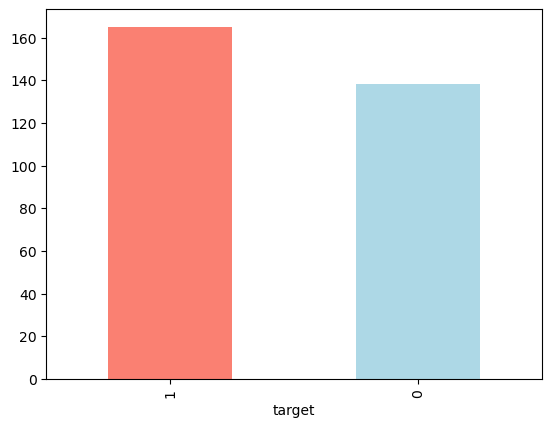

In [12]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
#Habrán valores nulos?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frecuencia de enfermedades cardiacas por sexo

In [18]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
# Comparemos la columna target con la columna sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

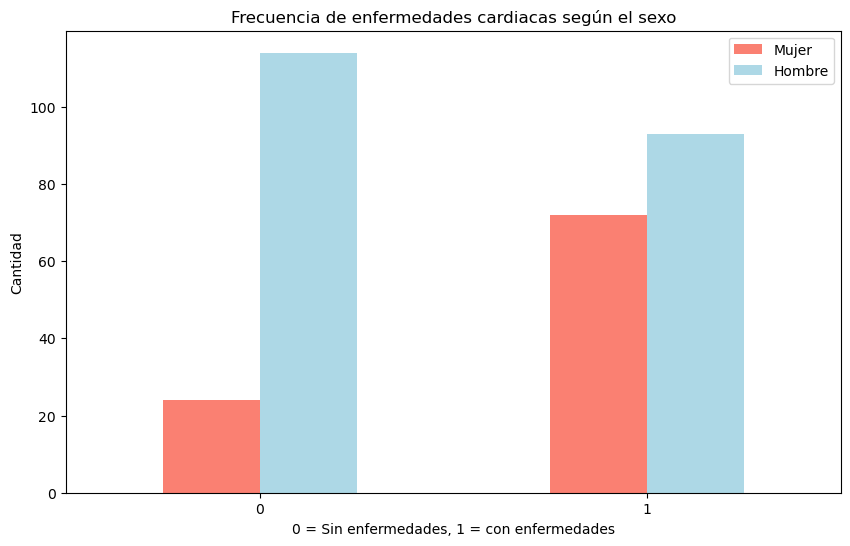

In [24]:
#Crear una grafica para la matriz de confusión

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])

plt.title("Frecuencia de enfermedades cardiacas según el sexo")
plt.xlabel("0 = Sin enfermedades, 1 = con enfermedades")
plt.ylabel("Cantidad")
plt.legend(["Mujer","Hombre"])
plt.xticks(rotation=0)

### Edad vs Maximo ritmo cardiaco por enfermedad cardiaca

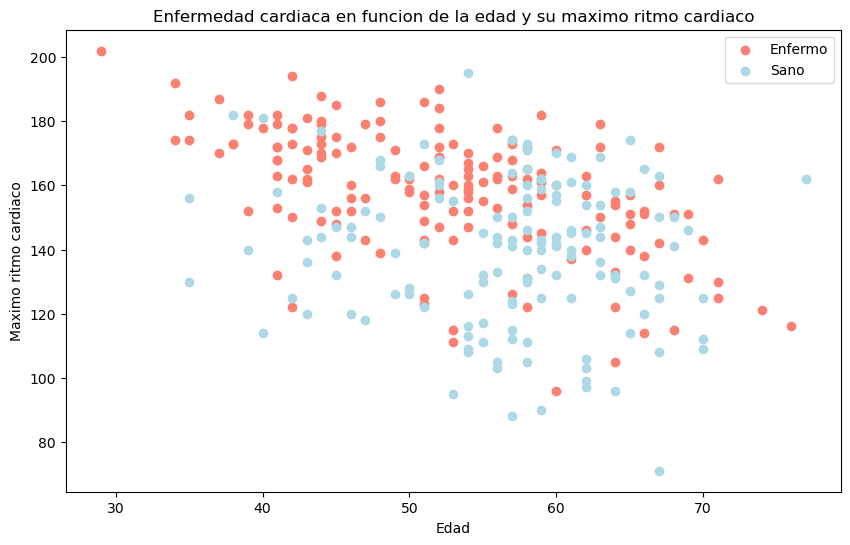

In [26]:

plt.figure(figsize=(10, 6))


plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Enfermedad cardiaca en funcion de la edad y su maximo ritmo cardiaco")
plt.xlabel("Edad")
plt.ylabel("Maximo ritmo cardiaco")
plt.legend(["Enfermo", "Sano"]);

#### Revisaremos la distribución de las edades con un histograma

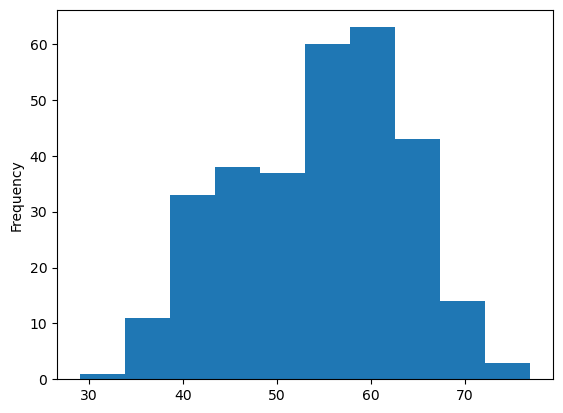

In [27]:
df.age.plot.hist();

### Frecuencia de Enfermedad Cardiaca por Tipo de Dolor Torácico

3. **cp** – Tipo de dolor torácico  
   * **0: Angina típica** — dolor torácico asociado a una disminución del flujo sanguíneo al corazón.  
   * **1: Angina atípica** — dolor torácico no relacionado con el corazón.  
   * **2: Dolor no anginoso** — típicamente espasmos esofágicos (no relacionado con el corazón).  
   * **3: Asintomático** — dolor torácico que no presenta signos de enfermedad.

In [28]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


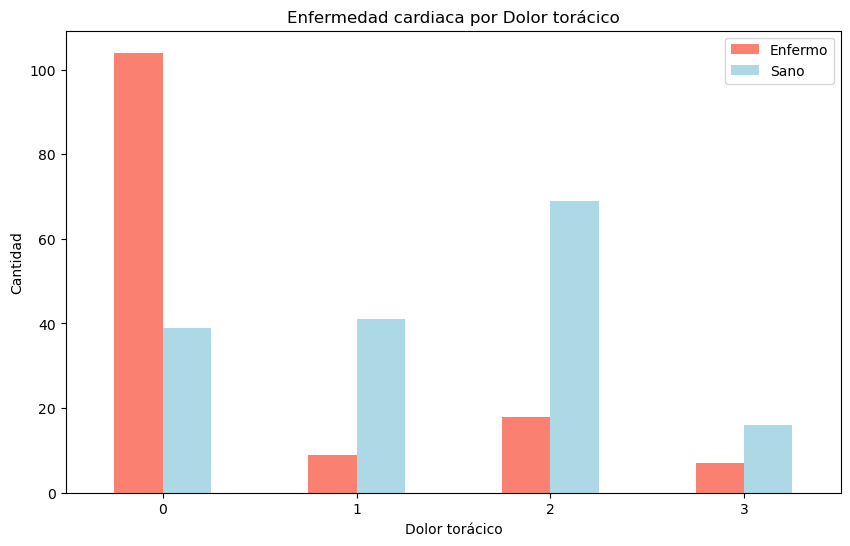

In [29]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Enfermedad cardiaca por Dolor torácico")
plt.xlabel("Dolor torácico")
plt.ylabel("Cantidad")
plt.legend(["Enfermo", "Sano"])
plt.xticks(rotation=0);

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Implementación de una matriz de correlación

In [31]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### Arreglo de la matrix de correlación para hacerla visualmente mas atractiva

(14.5, -0.5)

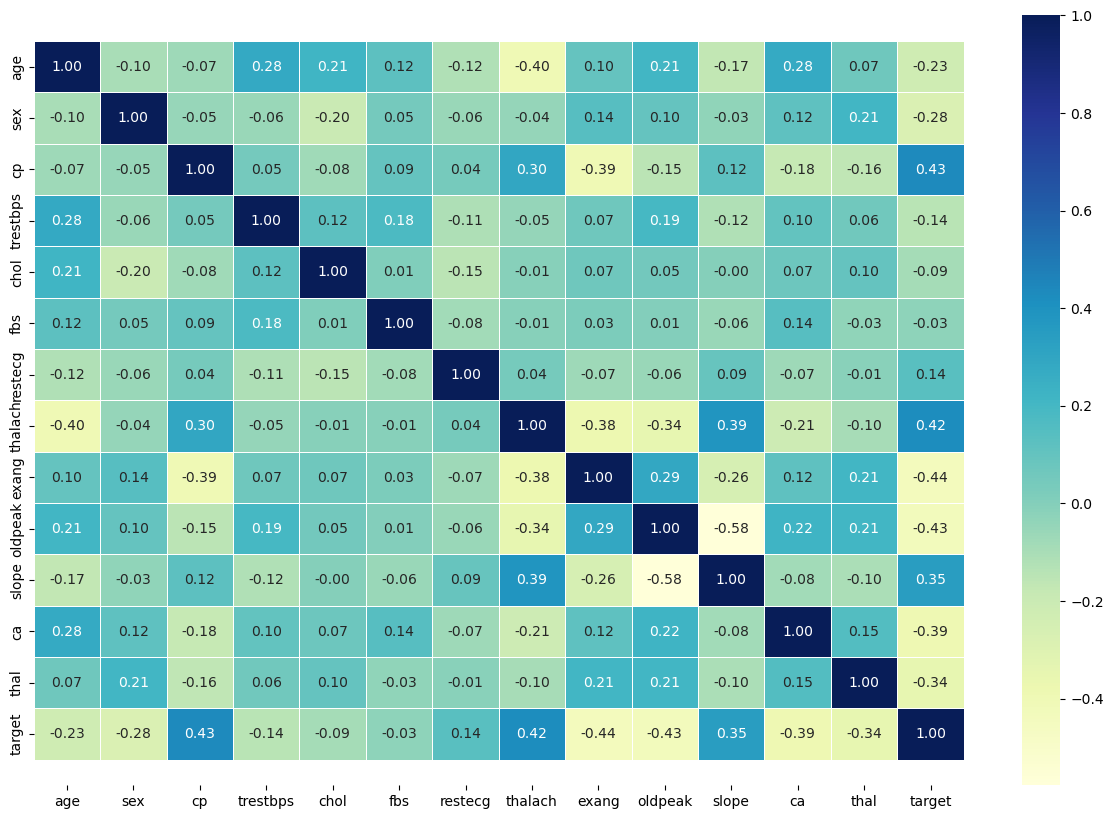

In [36]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)

## 5. Modelando

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Separar los datos en un eje X y un eje Y

In [39]:
X = df.drop("target", axis=1)

y = df["target"]

In [40]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [41]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Separar los datos en datos de entrenamientos y datos de prueba

In [43]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [44]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [45]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Ahora que tenemos nuestros datos divididos en conjuntos de entrenamiento y prueba, es momento de construir un modelo de machine learning.

Entrenaremos el modelo (para que aprenda los patrones) usando el conjunto de entrenamiento.

Y lo probaremos (aplicará los patrones aprendidos) usando el conjunto de prueba.

Vamos a probar 3 modelos de machine learning:

- **Regresión Logística**  
- **K-Nearest Neighbours (KNN) Classifier**  
- **Random Forest Classifier**


In [47]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [48]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        # le hace un fit del modelo a los datos
        model.fit(X_train, y_train)
        # Evalua el modelo e inserta su puntuación en model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [49]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Usuario\Desktop\project1ztm\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}